In [1]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [2]:
password_response, time_response, survey_response = get_responses(3)

## Password Analysis

In [3]:
pd.DataFrame(password_response)

,password2,password2_recall1
0,pSVNLb85CUNPCwX,NaN
1,ALB*1988,NaN
2,qwerty098!@#123cow,NaN
3,htdhtshstzdhthzhtt57@5,NaN
4,Blue123,NaN
5,BarronPeter#70,NaN
6,B0ilerMak3r!,NaN
7,Protect123,NaN
8,yadhu@558.,NaN
9,123456,NaN


## Time Analysis

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.839,13.774,12.693,19.878,67.504,134.684,15.391,25.888,13.926,19.650,9.519,48.709,6.457583
1,2.488,4.870,3.625,644.368,20.175,52.286,3.075,6.243,6.703,12.893,5.351,25.363,13.124000
2,3.674,12.131,8.609,16.923,44.405,275.207,16.491,26.397,17.456,21.576,9.910,40.114,8.214883
3,12.377,9.738,5.385,9.508,37.386,90.432,7.297,25.108,19.352,14.337,8.473,26.208,4.426683
4,2.515,12.946,3.041,5.930,66.074,87.206,3.848,64.031,10.265,16.681,13.065,30.811,5.273550
5,10.980,28.631,19.546,230.663,127.454,394.881,31.918,24.823,12.701,36.139,13.160,61.685,16.543017
6,7.053,16.116,6.916,29.195,61.689,319.461,15.143,37.911,36.051,23.550,9.748,40.313,10.052433
7,160.483,32.290,19.592,24.977,65.178,234.907,28.962,119.355,78.785,24.012,18.770,60.508,14.463650
8,8.907,46.714,27.385,36.634,102.204,160.225,9.932,31.994,13.861,28.005,16.246,99.965,9.701200
9,2.842,20.894,14.326,14.942,141.334,196.723,4.977,20.088,23.013,39.809,10.401,158.130,10.791317


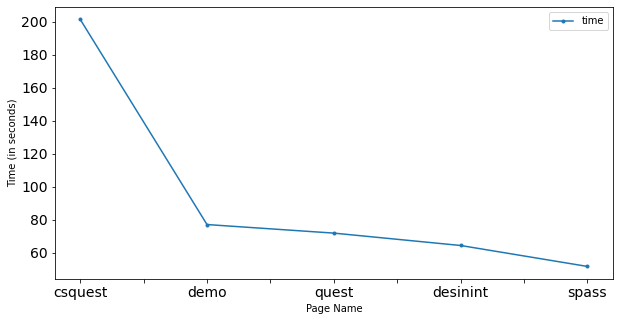

In [5]:
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

## Survey Response Analysis

In [6]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [7]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,mean,median
ordered,6.0,1.0,7.0,5.0,7.0,6.0,5.0,7.0,4.0,6.0,...,7.0,7.0,6.0,6.0,6.0,6.0,3.0,5.0,5.708333,6.000000
helpful,5.0,7.0,2.0,5.0,7.0,7.0,5.0,6.0,5.0,5.0,...,7.0,7.0,6.0,6.0,5.0,6.0,6.0,5.0,5.875000,6.000000
beneficial,5.0,3.0,2.0,6.0,7.0,7.0,5.0,5.0,3.0,6.0,...,6.0,7.0,7.0,6.0,5.0,6.0,5.0,6.0,5.541667,6.000000
organized,6.0,7.0,7.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,...,6.0,7.0,7.0,6.0,5.0,6.0,5.0,4.0,5.958333,6.000000
structured,6.0,6.0,7.0,5.0,7.0,6.0,5.0,7.0,4.0,5.0,...,6.0,7.0,6.0,5.0,5.0,6.0,6.0,5.0,5.916667,6.000000
well grouped,6.0,5.0,7.0,5.0,7.0,7.0,5.0,6.0,6.0,2.0,...,5.0,7.0,7.0,3.0,6.0,7.0,5.0,6.0,5.791667,6.000000
rewarding,2.0,4.0,2.0,4.0,6.0,7.0,5.0,6.0,5.0,6.0,...,6.0,7.0,6.0,6.0,3.0,6.0,5.0,3.0,5.208333,6.000000
appealing,1.0,5.0,2.0,5.0,7.0,6.0,5.0,6.0,5.0,2.0,...,7.0,7.0,6.0,6.0,4.0,6.0,5.0,6.0,5.166667,5.166667
pleasant,1.0,5.0,3.0,4.0,7.0,4.0,4.0,5.0,6.0,2.0,...,6.0,7.0,6.0,6.0,4.0,6.0,5.0,3.0,4.458333,5.000000
understandable,6.0,6.0,7.0,6.0,5.0,6.0,5.0,5.0,4.0,6.0,...,6.0,7.0,6.0,5.0,6.0,6.0,5.0,6.0,5.791667,6.000000


### CSQuest

In [8]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['8-1', '10-1']
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
8-1,[None of the above],"[Social Media, Email]",[None of the above],"[Social Media, Email]","[Email, Financial Websites, E-commerce Websites]","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Gaming Websites, Content...","[Gaming Websites, E-commerce Websites]",[Social Media],...,"[Social Media, Email, Financial Websites, Gami...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Gaming Websites, E-comme...","[Social Media, Financial Websites, Gaming Webs...","[Financial Websites, Government Websites]","[Social Media, Email, Gaming Websites, Course ...",[None of the above],"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co..."
10-1,"I guess the last panel, which shows how easy i...",ALB*1988,"Mainly the child asking the dad what he did, s...",I already create crazy passwords because I kno...,working on the laptop,The guy in black behind the window is all I ne...,The portrayal of a family just engaging in cas...,They mentioned that i will now send computer ...,Different charactior and symbols combinatiob,All Parts of the presented design motivates me...,...,Seeing how my lack of security with my own pas...,The part where the virus spreads to other fami...,The way of notification or reminder that From ...,The entire design of the slides,That a virus can be so easily transmitted and ...,The security part motivates me,I think the last panel where you see the other...,2,Because of the hacker. It motivates me to crea...,THE PASSWORDS CAN BE EASILY ACCESSBLE ONE TO A...


In [9]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,mean,median
portrayal of hacker stimulates,1.0,5.0,1.0,5.0,7.0,6.0,5.0,5.0,6.0,6.0,...,4.0,2.0,5.0,6.0,5.0,6.0,5.0,7.0,5.083333,5.000000
portrayal of victim encourages,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,3.0,6.0,...,5.0,7.0,6.0,6.0,5.0,6.0,5.0,6.0,5.583333,6.000000
Makes me worried,1.0,5.0,2.0,5.0,7.0,5.0,5.0,2.0,5.0,6.0,...,1.0,7.0,6.0,5.0,5.0,6.0,5.0,5.0,4.541667,5.000000
Encourages me to create a strong password,4.0,4.0,4.0,6.0,5.0,5.0,5.0,6.0,3.0,5.0,...,5.0,7.0,7.0,6.0,6.0,7.0,6.0,7.0,5.625000,6.000000
Makes me feel emotionally connected to the presented scenario,1.0,6.0,1.0,5.0,6.0,6.0,5.0,7.0,6.0,6.0,...,4.0,7.0,5.0,6.0,3.0,6.0,5.0,6.0,5.041667,6.000000
Makes me feel personally connected to the presented scenario,1.0,5.0,1.0,5.0,7.0,5.0,4.0,5.0,4.0,5.0,...,5.0,7.0,6.0,5.0,3.0,6.0,5.0,7.0,4.750000,5.000000
easy to follow,7.0,6.0,7.0,6.0,5.0,7.0,5.0,4.0,6.0,6.0,...,6.0,7.0,6.0,7.0,5.0,7.0,5.0,6.0,6.000000,6.000000
Novel,1.0,6.0,2.0,4.0,6.0,4.0,4.0,4.0,3.0,6.0,...,4.0,7.0,6.0,5.0,3.0,6.0,4.0,5.0,4.500000,4.500000
Informative,5.0,6.0,2.0,5.0,6.0,6.0,5.0,6.0,6.0,6.0,...,6.0,7.0,6.0,6.0,6.0,5.0,4.0,7.0,5.333333,6.000000
Well Organized,2.0,3.0,5.0,4.0,4.0,4.0,5.0,6.0,3.0,2.0,...,6.0,7.0,5.0,6.0,6.0,6.0,4.0,3.0,4.791667,5.000000


### First Password Survey

In [10]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,mean,median
"I do not change my passwords, unless I have to.",6,5,7,1,7,7,5,6,5,5,...,5,1,6,6,5,6,5,4,5.041667,5.0
I use different passwords for different online accounts that I have.,7,7,7,7,5,3,6,5,3,7,...,4,7,3,4,6,6,6,5,5.666667,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",7,6,7,7,6,2,4,4,5,6,...,5,7,2,6,6,6,6,6,5.500000,6.0
I do not include special characters in my password if it’s not required.,1,6,1,1,7,6,4,2,4,6,...,2,1,1,5,3,6,1,3,3.208333,3.0


### Second Password Survey

In [11]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,mean,median
strength of password,7,6,6,5,7,5,5,7,7,6,...,7,7,6,5,4,7,7,7,6.041667,6.0
motivated after going through design,1,5,4,5,6,6,5,6,6,6,...,5,7,7,6,5,6,5,6,5.583333,6.0
Hard to remember,7,6,3,5,7,3,3,2,4,6,...,2,1,3,6,2,7,3,4,4.000000,4.0
Can be easily guessed by a hacker,1,5,1,1,6,2,4,1,6,5,...,1,1,1,4,5,6,1,2,2.750000,2.0
Can be easily guessed by my close friends or family members,1,7,1,1,7,1,4,3,4,6,...,3,1,1,6,2,6,3,1,2.875000,2.0
Stronger than the passwords I usually use,4,6,4,1,7,5,4,6,6,6,...,6,7,6,5,1,6,7,6,4.791667,5.0


### Demographics

In [12]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

demo = demo.rename(new_index).transpose()
demo


,What is your gender?,What is your age range?,What is your race?,What is your highest achieved education level?,What is the primary field of your education?,Which of the following best describes your primary occupation?,Which of the following best describes your experience in computer and technology related fields?,Which of the following best describes your experience in cybersecurity?
0,Man,35-39 years old,[Hispanic or Latino],High School Graduate,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,No experience
1,Man,30-34 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree
2,Non-Binary,25-29 years old,[Asian],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,I prefer not to answer
3,Man,35-39 years old,[White],Two-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Self-taught,Self-taught
4,Man,60-64 years old,[White],Graduate degree (MS/Doctorate),Business,Business or industry,Formal training,Formal training
5,Man,30-34 years old,[White],Four-year College Degree,Business,Business or industry,No experience,No experience
6,Man,30-34 years old,[White],High School Graduate,"Architecture, Design, and Arts",Business or industry,Self-taught,No experience
7,Man,35-39 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Hold or held a work position,Formal training
8,Woman,35-39 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree
9,Man,35-39 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Formal training


In [13]:
demo['What is your gender?'].value_counts()

Man           18
Woman          5
Non-Binary     1
Name: What is your gender?, dtype: int64